In [1]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt

### Data load
#### Data description: https://archive.ics.uci.edu/ml/datasets/wine+quality

In [2]:
url = 'https://raw.githubusercontent.com/JunetaeKim/DeepLearningClass/main/Dataset/wine.csv'
df = pd.read_csv(url, header=None)

### Data shuffling and sampling

In [3]:
df = df.sample(frac=1.0)
dataset = df.values
X = dataset[:, :12]
Y = dataset[:, 12]
X.shape, Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

### Model structure 

In [4]:
def WineModel ():
    
    Inp = Input(shape=(X.shape[-1]))
    Hidden1 = Dense(30, activation='relu')(Inp)
    Hidden2 = Dense(12, activation='relu')(Hidden1)
    Hidden3 = Dense(8, activation='relu')(Hidden2)
    Output = Dense(1, activation='sigmoid')(Hidden3)

    return Model(Inp, Output)

Wine = WineModel()
Wine.compile(loss=tf.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

### Model save directory setting

In [5]:
save_path = './Results/'
if not os.path.exists(save_path):
    os.mkdir(save_path)


### Model save environment setting: Saving the model training result with the same name over epochs if the training performance improves. 

In [6]:
ModelSaveSameName = save_path+'WineM.hdf5'
ModelSave = ModelCheckpoint(filepath=ModelSaveSameName, monitor='val_loss', verbose=1, save_best_only=True)

### Early Stopping setting

In [7]:
EarlyStop = EarlyStopping(monitor='val_loss', patience=5)

In [8]:
Wine.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=200, batch_size=300,  verbose=1, callbacks=[ModelSave, EarlyStop])

Epoch 1/200
18/18 [==============================] - 2s 81ms/step - loss: 1.5485 - accuracy: 0.5140 - val_loss: 0.5172 - val_accuracy: 0.8123

Epoch 00001: val_loss improved from inf to 0.51720, saving model to ./Results\WineM.hdf5
Epoch 2/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4621 - accuracy: 0.8292 - val_loss: 0.3610 - val_accuracy: 0.8454

Epoch 00002: val_loss improved from 0.51720 to 0.36097, saving model to ./Results\WineM.hdf5
Epoch 3/200
18/18 [==============================] - 0s 5ms/step - loss: 0.3162 - accuracy: 0.8733 - val_loss: 0.2723 - val_accuracy: 0.8892

Epoch 00003: val_loss improved from 0.36097 to 0.27232, saving model to ./Results\WineM.hdf5
Epoch 4/200
18/18 [==============================] - 0s 5ms/step - loss: 0.2479 - accuracy: 0.9000 - val_loss: 0.2360 - val_accuracy: 0.9062

Epoch 00004: val_loss improved from 0.27232 to 0.23599, saving model to ./Results\WineM.hdf5
Epoch 5/200
18/18 [==============================] - 0s 5ms/ste

### Model weight load and evaluate it 

In [9]:
WineRe = WineModel()
WineRe.compile(loss=tf.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])
print('Before loading weights')
print(WineRe.evaluate(X_test,Y_test))
print()

WineRe.load_weights(ModelSaveSameName)
print('After loading weights')
print(WineRe.evaluate(X_test,Y_test))

Before loading weights
41/41 [==============================] - 0s 1ms/step - loss: 12.6794 - accuracy: 0.2547
[12.757585525512695, 0.24384614825248718]

After loading weights
41/41 [==============================] - 0s 1ms/step - loss: 0.0718 - accuracy: 0.9762
[0.07180698961019516, 0.9761538505554199]


### Plot loss graphs

Text(0, 0.5, 'loss')

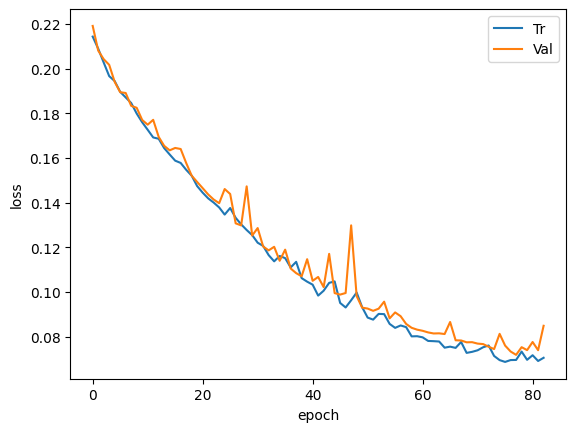

In [10]:
StartIDX = 5
plt.plot(Wine.history.history['loss'][StartIDX:], label='Tr')
plt.plot(Wine.history.history['val_loss'][StartIDX:], label='Val')
plt.legend() 
plt.xlabel('epoch')
plt.ylabel('loss')

### Check the number of epochs

In [11]:
len(Wine.history.history['loss'])

88